In [3]:
# !pip install torch numpy matplotlib

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [5]:
loaded_embeddings = torch.load("sanskrit_embeddings.pt")

Loading embeddings...


In [6]:
all_embeddings = []
all_words = []
all_positions = []

In [7]:
for i, sentence_data in enumerate(loaded_embeddings):
    for word_data in sentence_data['word_embeddings']:
        embedding_tensor = torch.tensor(word_data['combined_embedding'])
        all_embeddings.append(embedding_tensor)
        all_words.append(word_data['word'])
        all_positions.append(word_data['position'])

/tmp/ipython-input-1559227658.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embedding_tensor = torch.tensor(word_data['combined_embedding'])


In [8]:
print(f"Total embeddings loaded: {len(all_embeddings)}")
print(f"Embedding dimension: {all_embeddings[0].shape}")

Total embeddings loaded: 56
Embedding dimension: torch.Size([976])


In [9]:
#Convert to the tensor
embeddings_tensor = torch.stack(all_embeddings)
print(f"All embeddings shape: {embeddings_tensor.shape}")

All embeddings shape: torch.Size([56, 976])


In [15]:
test_embeddings = embeddings_tensor[:]
print(test_embeddings)
print(test_embeddings.shape)

tensor([[-3.5441e-01,  8.9045e-01, -7.6863e-01,  ...,  1.0000e+00,
          0.0000e+00,  1.0000e+00],
        [ 4.1452e-01,  4.1891e-01, -3.4631e-01,  ...,  1.0000e+00,
          1.0366e-04,  1.0000e+00],
        [-3.6353e-01,  4.8728e-01,  4.2952e-02,  ...,  1.0000e+00,
          2.0733e-04,  1.0000e+00],
        ...,
        [ 6.3289e-01,  1.9601e-01,  8.6973e-01,  ...,  1.0000e+00,
          8.2931e-04,  1.0000e+00],
        [ 3.2115e-01, -4.9712e-03,  3.4690e-02,  ...,  1.0000e+00,
          9.3297e-04,  1.0000e+00],
        [ 8.0995e-01,  4.9992e-01,  5.8115e-01,  ...,  1.0000e+00,
          1.0366e-03,  1.0000e+00]])
torch.Size([56, 976])


In [16]:
d_model = test_embeddings.shape[1]
print(d_model)

976


In [17]:
Q = test_embeddings  # Query
K = test_embeddings  # Key
V = test_embeddings  # Value


In [22]:
# Calculate attention scores
attention_scores = torch.matmul(Q, K.T) / np.sqrt(d_model)
# print(attention_scores)
attention_weights = F.softmax(attention_scores, dim=-1)
# print(attention_weights)
output = torch.matmul(attention_weights, V)
# print(output)

In [19]:
print(f"Attention scores shape: {attention_scores.shape}")
print(f"Attention weights shape: {attention_weights.shape}")
print(f"Output shape: {output.shape}")

Attention scores shape: torch.Size([56, 56])
Attention weights shape: torch.Size([56, 56])
Output shape: torch.Size([56, 976])


In [23]:
for i, word in enumerate(all_words[:]):
    print(f"'{word}': {attention_weights[i].detach().numpy()}")

'आत्मा': [9.9885559e-01 7.4469921e-05 3.0816849e-05 2.6603131e-05 1.3568663e-06
 1.0049509e-05 2.9620083e-05 3.5433545e-06 1.2911279e-06 1.4063689e-06
 1.7158769e-05 1.1626436e-05 2.1000770e-04 9.4821562e-06 1.0712189e-06
 7.9502870e-06 8.8523984e-07 1.0110494e-05 6.5804425e-06 5.8525211e-06
 1.1880874e-05 1.2978839e-05 9.8131368e-06 5.7703537e-06 5.0037784e-06
 6.7476458e-07 5.6232125e-06 4.8903094e-06 4.3736625e-07 5.6471431e-06
 1.2342108e-05 4.7549543e-06 7.4783034e-06 1.2636720e-05 5.7630446e-06
 4.5499587e-07 2.5454592e-06 6.2820613e-06 1.7361305e-06 2.4802271e-06
 4.8712204e-06 7.3847737e-06 7.4657687e-06 4.9262940e-07 1.4199895e-05
 2.2133604e-04 4.0849525e-05 1.3078208e-04 5.6092733e-05 6.4292115e-05
 3.2785397e-06 3.7131699e-06 2.1228834e-06 3.4667039e-06 2.8217962e-06
 2.2521428e-06]
'सर्वत्र': [3.62338978e-05 9.99329686e-01 1.27703985e-04 1.58563649e-04
 3.63549043e-05 1.47405472e-05 8.27659790e-07 1.14225613e-05
 1.30453973e-05 7.96931454e-06 1.29625369e-06 8.55302630e-07


In [24]:
#SELF ATTENTION MODEL
class SelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super(SelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)
    def forward(self, x):
        batch_size, seq_len, embed_dim = x.shape
        Q = self.query(x)  # (batch_size, seq_len, embed_dim)
        K = self.key(x)    # (batch_size, seq_len, embed_dim)
        V = self.value(x)  # (batch_size, seq_len, embed_dim)
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(embed_dim, dtype=torch.float32))
        print(attention_scores)
        attention_weights = F.softmax(attention_scores, dim=-1)
        print(attention_weights)
        output = torch.matmul(attention_weights, V)
        print(output)
        return output, attention_weights




In [27]:
embed_dim = embeddings_tensor.shape[1]
self_attention = SelfAttention(embed_dim)
print(embed_dim)
print(self_attention)

976
SelfAttention(
  (query): Linear(in_features=976, out_features=976, bias=True)
  (key): Linear(in_features=976, out_features=976, bias=True)
  (value): Linear(in_features=976, out_features=976, bias=True)
)


In [31]:
batch_sequences = embeddings_tensor[:8].view(2, 4, embed_dim)
print(batch_sequences)
print(f"Input batch shape: {batch_sequences.shape}")

tensor([[[-3.5441e-01,  8.9045e-01, -7.6863e-01,  ...,  1.0000e+00,
           0.0000e+00,  1.0000e+00],
         [ 4.1452e-01,  4.1891e-01, -3.4631e-01,  ...,  1.0000e+00,
           1.0366e-04,  1.0000e+00],
         [-3.6353e-01,  4.8728e-01,  4.2952e-02,  ...,  1.0000e+00,
           2.0733e-04,  1.0000e+00],
         [ 1.1288e-01, -1.0844e-01, -1.7711e-01,  ...,  1.0000e+00,
           3.1099e-04,  1.0000e+00]],

        [[ 3.8090e-01,  7.8335e-01, -4.7383e-02,  ...,  1.0000e+00,
           4.1465e-04,  1.0000e+00],
         [ 1.5257e-02, -9.5460e-02,  2.7420e-02,  ...,  1.0000e+00,
           5.1832e-04,  1.0000e+00],
         [-5.8367e-01, -1.3951e-01, -6.4660e-01,  ...,  1.0000e+00,
           6.2198e-04,  1.0000e+00],
         [ 1.3170e-01, -9.0699e-02,  3.0416e-01,  ...,  1.0000e+00,
           7.2564e-04,  1.0000e+00]]])
Input batch shape: torch.Size([2, 4, 976])


In [33]:
output, attention_weights = self_attention(batch_sequences)
print(f"Output shape: {output.shape}")
print(f"Attention weights shape: {attention_weights.shape}")

tensor([[[-0.1976, -0.3713,  0.0333, -0.0429],
         [-0.2388, -0.1412,  0.0541,  0.0874],
         [-0.1319, -0.0667,  0.1435,  0.1960],
         [-0.1799, -0.3753, -0.0625, -0.0375]],

        [[-0.1967, -0.0283, -0.0719, -0.0261],
         [ 0.1023,  0.0427,  0.0825,  0.2892],
         [-0.2746,  0.0100, -0.0348, -0.0981],
         [-0.0165,  0.1122,  0.0036,  0.3481]]], grad_fn=<DivBackward0>)
tensor([[[0.2343, 0.1970, 0.2952, 0.2735],
         [0.2071, 0.2283, 0.2776, 0.2870],
         [0.2095, 0.2236, 0.2760, 0.2908],
         [0.2439, 0.2006, 0.2743, 0.2812]],

        [[0.2221, 0.2629, 0.2516, 0.2634],
         [0.2423, 0.2282, 0.2375, 0.2920],
         [0.2086, 0.2773, 0.2652, 0.2489],
         [0.2175, 0.2474, 0.2219, 0.3132]]], grad_fn=<SoftmaxBackward0>)
tensor([[[-0.2042,  0.4149, -0.0727,  ...,  0.7150, -0.1977,  0.0882],
         [-0.1919,  0.4519, -0.0577,  ...,  0.7066, -0.1980,  0.0834],
         [-0.1917,  0.4492, -0.0573,  ...,  0.7066, -0.1990,  0.0856],
       

In [34]:
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads=8):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        assert self.head_dim * num_heads == embed_dim, "Embed dim must be divisible by num_heads"
        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)
        self.out_proj = nn.Linear(embed_dim, embed_dim)
    def forward(self, x):
        batch_size, seq_len, embed_dim = x.shape
        Q = self.query(x).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        K = self.key(x).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        V = self.value(x).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.head_dim, dtype=torch.float32))
        attention_weights = F.softmax(attention_scores, dim=-1)

        attention_output = torch.matmul(attention_weights, V)
        attention_output = attention_output.transpose(1, 2).contiguous().view(batch_size, seq_len, embed_dim)

        output = self.out_proj(attention_output)

        return output, attention_weights

In [36]:
multi_head_attention = MultiHeadSelfAttention(embed_dim, num_heads=8)
output, attention_weights = multi_head_attention(batch_sequences)
print(f"Multi-head output shape: {output.shape}")
print(f"Multi-head attention weights shape: {attention_weights.shape}")

Multi-head output shape: torch.Size([2, 4, 976])
Multi-head attention weights shape: torch.Size([2, 8, 4, 4])


In [37]:
class SelfAttentionModel(nn.Module):
    def __init__(self, embed_dim, num_heads=8, num_layers=2):
        super(SelfAttentionModel, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.num_layers = num_layers
        self.attention_layers = nn.ModuleList([
            MultiHeadSelfAttention(embed_dim, num_heads) for _ in range(num_layers)
        ])
        self.layer_norms = nn.ModuleList([
            nn.LayerNorm(embed_dim) for _ in range(num_layers)
        ])
        self.feed_forward = nn.Sequential(
            nn.Linear(embed_dim, embed_dim * 4),
            nn.ReLU(),
            nn.Linear(embed_dim * 4, embed_dim)
        )
        self.output_layer_norm = nn.LayerNorm(embed_dim)
    def forward(self, x, return_attention=False):
        attention_maps = []
        for i, (attention_layer, layer_norm) in enumerate(zip(self.attention_layers, self.layer_norms)):
            residual = x
            attn_output, attn_weights = attention_layer(layer_norm(x))
            x = residual + attn_output
            residual = x
            ff_output = self.feed_forward(self.output_layer_norm(x))
            x = residual + ff_output

            attention_maps.append(attn_weights)

        if return_attention:
            return x, attention_maps
        return x

In [38]:
model = SelfAttentionModel(embed_dim, num_heads=8, num_layers=2)
output, attention_maps = model(batch_sequences, return_attention=True)

In [39]:
print(f"Model output shape: {output.shape}")
print(f"Number of attention maps: {len(attention_maps)}")
print(f"Attention map shape from first layer: {attention_maps[0].shape}")

Model output shape: torch.Size([2, 4, 976])
Number of attention maps: 2
Attention map shape from first layer: torch.Size([2, 8, 4, 4])


In [41]:
def visualize_attention(attention_weights, words, layer_idx=0, head_idx=0):
    plt.figure(figsize=(10, 8))

    attn = attention_weights[layer_idx][0, head_idx].detach().numpy()

    plt.imshow(attn, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(f"Attention Pattern - Layer {layer_idx}, Head {head_idx}")
    plt.xlabel("Key Position")
    plt.ylabel("Query Position")

    if words is not None:
        plt.xticks(range(len(words)), words, rotation=45)
        plt.yticks(range(len(words)), words)

    plt.tight_layout()
    plt.show()


In [44]:
first_sequence_words = all_words[:]
print("Words in sequence:", first_sequence_words)
print(first_sequence_words)
# visualize_attention(attention_maps, first_sequence_words, layer_idx=0, head_idx=0)

Words in sequence: ['आत्मा', 'सर्वत्र', 'व्याप्यते', 'मनः', 'चित्तसंग्रहाय', 'कार्यं', 'करोति', 'जीवनं', 'दुःखसुखयोः', 'मिश्रितं', 'भवति', 'धर्मः', 'आत्मनः', 'प्रगतिपथः', 'अर्थस्य', 'साधनं', 'आवश्यकं,', 'किंतु', 'अहंकारं', 'त्यजेत्', 'कामे', 'च', 'संयमः', 'धर्मेण', 'सह', 'योजनीयः', 'मोक्षाय', 'साधना', 'अनिवार्या', 'सत्यं', 'वद,', 'अहिंसा', 'चर,', 'क्षमा', 'धर्तु', 'मित्राणां', 'संगः', 'सुखदायकः,', 'शत्रूणां', 'संगः', 'दुखदायकः', 'गुरुशिष्ययोः', 'संबंधः', 'ज्ञानस्य', 'आधारः', 'विद्या', 'विज्ञानयोः', 'संयोजनं', 'मनसः', 'शान्त्यै', 'उपयुक्तम्', 'संगीतं', 'कला', 'च', 'हृदयशान्तये', 'उपयोगी']
['आत्मा', 'सर्वत्र', 'व्याप्यते', 'मनः', 'चित्तसंग्रहाय', 'कार्यं', 'करोति', 'जीवनं', 'दुःखसुखयोः', 'मिश्रितं', 'भवति', 'धर्मः', 'आत्मनः', 'प्रगतिपथः', 'अर्थस्य', 'साधनं', 'आवश्यकं,', 'किंतु', 'अहंकारं', 'त्यजेत्', 'कामे', 'च', 'संयमः', 'धर्मेण', 'सह', 'योजनीयः', 'मोक्षाय', 'साधना', 'अनिवार्या', 'सत्यं', 'वद,', 'अहिंसा', 'चर,', 'क्षमा', 'धर्तु', 'मित्राणां', 'संगः', 'सुखदायकः,', 'शत्रूणां', 'संगः', 'दु

In [45]:

def create_training_data(embeddings, sequence_length=3):
    sequences = []
    targets = []

    for i in range(len(embeddings) - sequence_length):
        sequences.append(embeddings[i:i+sequence_length])
        targets.append(embeddings[i+sequence_length])

    return torch.stack(sequences), torch.stack(targets)


In [46]:

sequence_length = 3
X, y = create_training_data(embeddings_tensor, sequence_length)
print(f"Training sequences: {X.shape}")
print(f"Training targets: {y.shape}")


Training sequences: torch.Size([53, 3, 976])
Training targets: torch.Size([53, 976])


In [48]:
def train_simple_model(model, X, y, epochs=100):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        outputs = model(X)

        predictions = outputs[:, -1, :]

        loss = criterion(predictions, y)

        # Backward pass
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 20 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    return losses


In [49]:

small_X = X[:50]
small_y = y[:50]


Training model...
Epoch 0, Loss: 0.9044
Epoch 20, Loss: 0.8625
Epoch 40, Loss: 0.5876
Epoch 60, Loss: 0.2851
Epoch 80, Loss: 0.1360


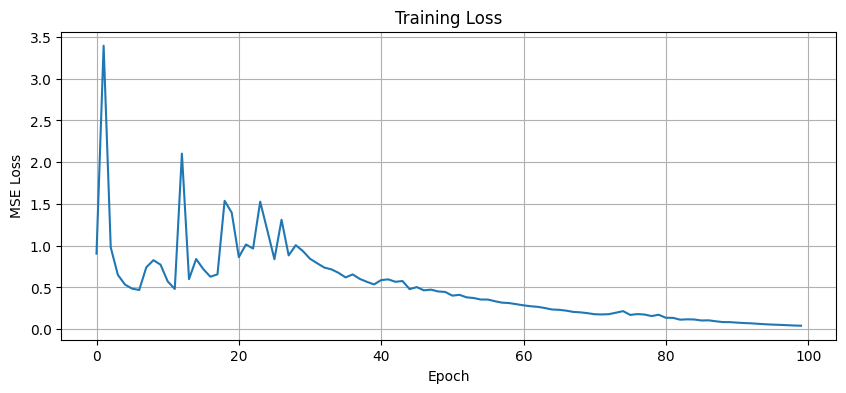

In [50]:
losses = train_simple_model(model, small_X, small_y, epochs=100)

plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


In [51]:
vocab = list(set(all_words))
word_to_idx = {word: idx for idx, word in enumerate(vocab)}
idx_to_word = {idx: word for word, idx in word_to_idx.items()}

In [52]:
print(f"Vocabulary size: {len(vocab)}")
print(f"Sample words: {vocab[:10]}")


Vocabulary size: 54
Sample words: ['व्याप्यते', 'मनसः', 'विद्या', 'किंतु', 'संगीतं', 'प्रगतिपथः', 'मित्राणां', 'हृदयशान्तये', 'उपयोगी', 'चर,']


In [55]:
embedding_matrix = torch.stack(all_embeddings)
print(f"Embedding matrix shape: {embedding_matrix.shape}")
model.eval()

Embedding matrix shape: torch.Size([56, 976])


SelfAttentionModel(
  (attention_layers): ModuleList(
    (0-1): 2 x MultiHeadSelfAttention(
      (query): Linear(in_features=976, out_features=976, bias=True)
      (key): Linear(in_features=976, out_features=976, bias=True)
      (value): Linear(in_features=976, out_features=976, bias=True)
      (out_proj): Linear(in_features=976, out_features=976, bias=True)
    )
  )
  (layer_norms): ModuleList(
    (0-1): 2 x LayerNorm((976,), eps=1e-05, elementwise_affine=True)
  )
  (feed_forward): Sequential(
    (0): Linear(in_features=976, out_features=3904, bias=True)
    (1): ReLU()
    (2): Linear(in_features=3904, out_features=976, bias=True)
  )
  (output_layer_norm): LayerNorm((976,), eps=1e-05, elementwise_affine=True)
)

In [56]:
train_output, train_attention = model(small_X, return_attention=True)


In [57]:
with torch.no_grad():
    train_output, train_attention = model(small_X, return_attention=True)

    test_sequence = embeddings_tensor[:3].unsqueeze(0)
    test_output, test_attention = model(test_sequence, return_attention=True)


In [58]:

print(f"{small_X.shape}")
print(f"{train_output.shape}")
print(f"{train_output[:, -1, :].shape}")

print(f"{all_words[:]}")
print(f"{test_output[:, -1, :].shape}")

print(f"{len(train_attention)}")
print(f"{train_attention[0].shape}")


torch.Size([50, 3, 976])
torch.Size([50, 3, 976])
torch.Size([50, 976])
['आत्मा', 'सर्वत्र', 'व्याप्यते', 'मनः', 'चित्तसंग्रहाय', 'कार्यं', 'करोति', 'जीवनं', 'दुःखसुखयोः', 'मिश्रितं', 'भवति', 'धर्मः', 'आत्मनः', 'प्रगतिपथः', 'अर्थस्य', 'साधनं', 'आवश्यकं,', 'किंतु', 'अहंकारं', 'त्यजेत्', 'कामे', 'च', 'संयमः', 'धर्मेण', 'सह', 'योजनीयः', 'मोक्षाय', 'साधना', 'अनिवार्या', 'सत्यं', 'वद,', 'अहिंसा', 'चर,', 'क्षमा', 'धर्तु', 'मित्राणां', 'संगः', 'सुखदायकः,', 'शत्रूणां', 'संगः', 'दुखदायकः', 'गुरुशिष्ययोः', 'संबंधः', 'ज्ञानस्य', 'आधारः', 'विद्या', 'विज्ञानयोः', 'संयोजनं', 'मनसः', 'शान्त्यै', 'उपयुक्तम्', 'संगीतं', 'कला', 'च', 'हृदयशान्तये', 'उपयोगी']
torch.Size([1, 976])
2
torch.Size([50, 8, 3, 3])


/tmp/ipython-input-144655791.py:16: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-144655791.py:16: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
/tmp/ipython-input-144655791.py:16: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-144655791.py:16: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-144655791.py:16: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-144655791.py:16: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-144655791.py:16: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-

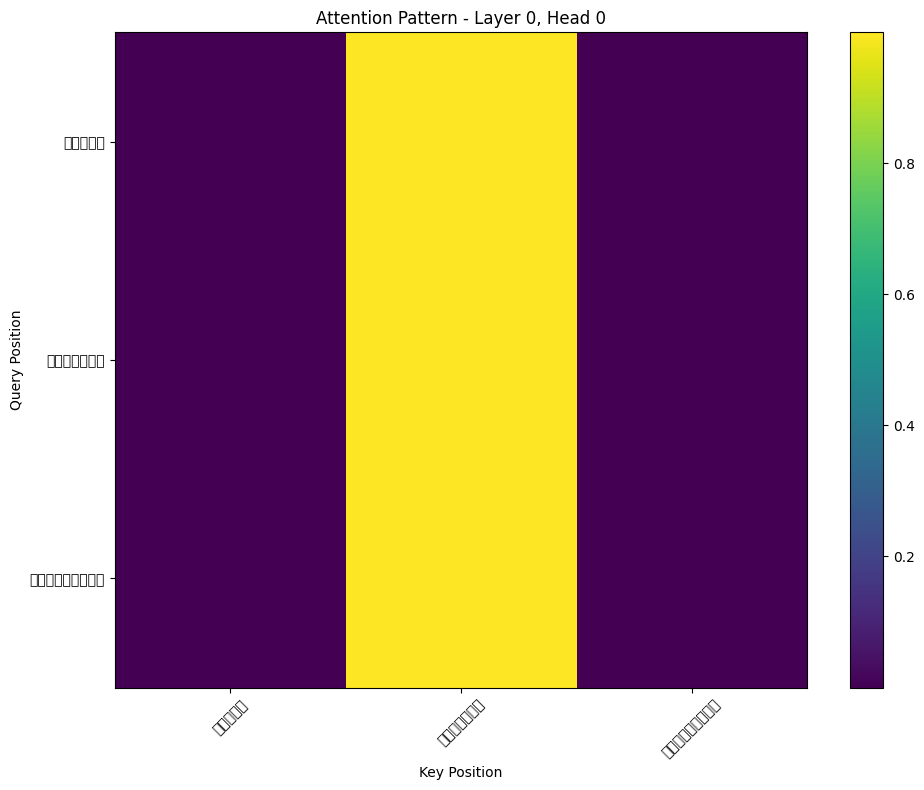

In [59]:
visualize_attention(train_attention, all_words[:sequence_length], layer_idx=0, head_idx=0)


In [62]:
actual_next = small_y[0]
predicted_next = train_output[0, -1, :]
print(actual_next)
print(predicted_next)

tensor([ 1.1288e-01, -1.0844e-01, -1.7711e-01,  2.0388e-02,  2.5875e-01,
         8.5920e-01,  2.8336e-01, -4.7927e-01, -4.2774e-01,  1.1818e+00,
        -4.3651e-01,  6.6830e-01,  5.9363e-01, -8.3225e-01,  3.0191e-01,
         1.1133e+00,  2.4535e-01, -1.1534e+00,  1.2625e+00,  1.2497e+00,
         7.1019e-02,  4.1711e-01,  5.4643e-01,  1.2064e+00, -6.4109e-01,
         1.2829e+00,  9.2346e-01, -2.8261e-01, -1.0455e-01,  7.6851e-01,
         1.2849e-01, -1.4425e-01,  1.0987e-01,  1.1247e+00, -1.0449e-01,
         2.0783e-01,  9.9552e-01,  1.7835e+00,  4.7541e-01, -7.3527e-01,
         4.5056e-01, -4.6873e-01, -7.3480e-02, -3.9093e-01, -4.4754e-01,
        -3.9544e-01,  9.7976e-01, -1.2434e+00, -2.2104e-01, -4.5346e-01,
         4.8550e-01,  6.8588e-01, -7.3547e-02,  3.9290e-01,  1.2748e-01,
         1.2330e+00, -1.2209e+00, -2.4375e-01, -1.4615e+00,  2.3935e-01,
        -2.1811e-01, -2.0410e-01,  2.1761e-01, -3.0723e-01,  6.4863e-01,
         6.0287e-01,  6.2469e-01, -2.2078e-01,  1.0

In [63]:

similarity = F.cosine_similarity(actual_next.unsqueeze(0), predicted_next.unsqueeze(0))
print(f"Cosine similarity between actual and predicted: {similarity.item():.4f}")




Cosine similarity between actual and predicted: 0.9599


In [64]:
mse_loss = F.mse_loss(predicted_next, actual_next)
print(f"{mse_loss.item():.4f}")


0.0488


In [70]:
def predict_next_word(model, input_embeddings, embedding_matrix, all_words, top_k=5):
    model.eval()

    with torch.no_grad():
        output, _ = model(input_embeddings.unsqueeze(0), return_attention=True)
        predicted_embedding = output[0, -1, :]
    similarities = []
    for i, emb in enumerate(embedding_matrix):
        sim = F.cosine_similarity(predicted_embedding.unsqueeze(0), emb.unsqueeze(0))
        similarities.append((i, sim.item()))

    similarities.sort(key=lambda x: x[1], reverse=True)

    for idx, sim in similarities[:top_k]:
        print(f"  {all_words}")
        print(f"  {all_words[idx]}: similarity = {sim:.4f}")

    return similarities[:top_k]

In [71]:

input_seq = embeddings_tensor[:3]
print(input_seq)
top_predictions = predict_next_word(model, input_seq, embeddings_tensor, all_words)


tensor([[-3.5441e-01,  8.9045e-01, -7.6863e-01,  ...,  1.0000e+00,
          0.0000e+00,  1.0000e+00],
        [ 4.1452e-01,  4.1891e-01, -3.4631e-01,  ...,  1.0000e+00,
          1.0366e-04,  1.0000e+00],
        [-3.6353e-01,  4.8728e-01,  4.2952e-02,  ...,  1.0000e+00,
          2.0733e-04,  1.0000e+00]])
  ['आत्मा', 'सर्वत्र', 'व्याप्यते', 'मनः', 'चित्तसंग्रहाय', 'कार्यं', 'करोति', 'जीवनं', 'दुःखसुखयोः', 'मिश्रितं', 'भवति', 'धर्मः', 'आत्मनः', 'प्रगतिपथः', 'अर्थस्य', 'साधनं', 'आवश्यकं,', 'किंतु', 'अहंकारं', 'त्यजेत्', 'कामे', 'च', 'संयमः', 'धर्मेण', 'सह', 'योजनीयः', 'मोक्षाय', 'साधना', 'अनिवार्या', 'सत्यं', 'वद,', 'अहिंसा', 'चर,', 'क्षमा', 'धर्तु', 'मित्राणां', 'संगः', 'सुखदायकः,', 'शत्रूणां', 'संगः', 'दुखदायकः', 'गुरुशिष्ययोः', 'संबंधः', 'ज्ञानस्य', 'आधारः', 'विद्या', 'विज्ञानयोः', 'संयोजनं', 'मनसः', 'शान्त्यै', 'उपयुक्तम्', 'संगीतं', 'कला', 'च', 'हृदयशान्तये', 'उपयोगी']
  मनः: similarity = 0.9599
  ['आत्मा', 'सर्वत्र', 'व्याप्यते', 'मनः', 'चित्तसंग्रहाय', 'कार्यं', 'करोति', 'जीवनं

In [72]:

print(f"\n{all_words[:3]}")
for i, (idx, sim) in enumerate(top_predictions):
    print(f"{i+1}. {all_words[idx]} (similarity: {sim:.4f})")


['आत्मा', 'सर्वत्र', 'व्याप्यते']
1. मनः (similarity: 0.9599)
2. व्याप्यते (similarity: 0.7236)
3. उपयुक्तम् (similarity: 0.5858)
4. चित्तसंग्रहाय (similarity: 0.5851)
5. सर्वत्र (similarity: 0.5711)
